 <img title="NeuralNetwork" src="https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/feedforward-neural-network/Colored_neural_network.svg.png?raw=1" width="400" /> <br> 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [ ]:
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023

fatal: destination path 'PHYS3151-Machine-Learning-in-Physics-2023' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/PHYS3151-Machine-Learning-in-Physics-2023/logistic-regression/iris-data.csv')

In [ ]:
def sigmoid(x):  
    return 1 / (1 + np.exp(-x))

# One Hidden Layer

In [ ]:
def find_accuracy(X_temp,Y_temp):
  acc=0
  m_temp=X_temp.shape[0]
  for i_temp in range(m_temp):
    x= X_temp[i_temp,:].reshape(n_feature+1,1)
    z2=np.dot(theta1,x)
    h2=sigmoid(z2)
    h2=np.r_[np.array(1).reshape(1,1), h2]
    z3=np.dot(theta2,h2)
    h3=sigmoid(z3)
    if h3[Y_temp[i_temp]]==max(h3):
      acc+=1
  acc=acc/m_temp*100
  return acc

In [ ]:
X = df.iloc[:, :4]        #features
m=X.shape[0]
X = np.c_[np.ones((m, 1)), X]    #we need x_0
X=np.array(X)
Y= df.iloc[:, 4]         #outcome
Y=[0 if Y[i]=='Iris-setosa' else 1 if Y[i]=='Iris-versicolor' else 2 for i in range(m)]
Y=np.array(Y)

In [ ]:
stack=list(range(150))
N_test=20
rd.shuffle(stack)
stack_test=stack[:N_test]
stack_train=stack[N_test:]

In [ ]:
X_train = X[stack_train,:]
m_train=X_train.shape[0]
Y_train = Y[stack_train]

In [ ]:
X_test = X[stack_test,:]
m_test=X_test.shape[0]
Y_test = Y[stack_test]

In [ ]:
#NN configurations
n_nodes=5
n_feature=4
n_output=3
theta1=np.zeros((n_nodes,n_feature+1))
theta2=np.zeros((n_output,n_nodes+1))

In [ ]:
alpha=4
n_itr=1000
I=int(n_itr/10)
cost_history=[]
acc_train_history=[]
acc_test_history=[]
for itr in range(n_itr):
  J=0
  acc_train=0
  for data_index in range(m_train):
    #forward propagation
    x= X_train[[data_index],:].T
    z2=np.dot(theta1,x)
    h2=sigmoid(z2)
    h2=np.r_[np.ones((1,1)), h2]
    z3=np.dot(theta2,h2)
    h3=sigmoid(z3)
    #back propagation
    y_temp=np.zeros((3,1))
    y_temp[Y_train[data_index]]=1
    Ym=h3-y_temp
    delta3=2/m_train*(Ym*h3*(1-h3))
    theta2=theta2-alpha*delta3@h2.T
    delta2=theta2.T@(delta3)*h2*(1-h2)
    theta1=theta1-alpha*delta2[1:,:]@x.T
    J+=np.linalg.norm(Ym,2)
    if h3[Y_train[data_index]]==max(h3):
      acc_train+=1
  acc_train*=100/m_train
  J/=m_train
  cost_history.append(J)
  acc_train_history.append(acc_train)
  acc_test_history.append(find_accuracy(X_test, Y_test))
  if (itr+1) % I==0:
    alpha/=1.2
    print('Complete:',int((itr+1)/I))
    print('The cost of train sample is {:.6f}'.format(J))
    print('The accuracy of train sample is {:.2f}'.format(acc_train))
    print('The accuracy of test sample is {:.2f}'.format(acc_test_history[-1]))

Complete: 1
The cost of train sample is 0.489119
The accuracy of train sample is 89.23
The accuracy of test sample is 90.00
Complete: 2
The cost of train sample is 0.473915
The accuracy of train sample is 93.08
The accuracy of test sample is 95.00
Complete: 3
The cost of train sample is 0.468215
The accuracy of train sample is 95.38
The accuracy of test sample is 95.00
Complete: 4
The cost of train sample is 0.465244
The accuracy of train sample is 95.38
The accuracy of test sample is 95.00
Complete: 5
The cost of train sample is 0.463408
The accuracy of train sample is 95.38
The accuracy of test sample is 95.00
Complete: 6
The cost of train sample is 0.462127
The accuracy of train sample is 95.38
The accuracy of test sample is 95.00
Complete: 7
The cost of train sample is 0.461156
The accuracy of train sample is 95.38
The accuracy of test sample is 95.00
Complete: 8
The cost of train sample is 0.460381
The accuracy of train sample is 95.38
The accuracy of test sample is 95.00
Complete

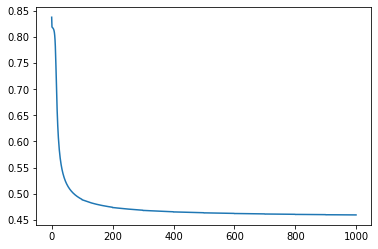

In [ ]:
plt.plot(cost_history)

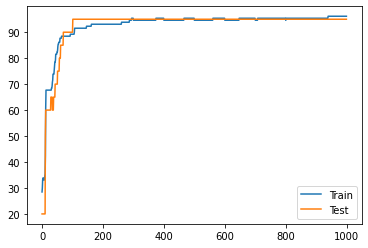

In [ ]:
plt.plot(acc_train_history,label='Train')
plt.plot(acc_test_history,label='Test')
plt.legend()

In [ ]:
index_temp=54
x= X[[index_temp],:].T
z2=np.dot(theta1,x)
h2=sigmoid(z2)
h2=np.r_[np.ones((1,1)), h2]
z3=np.dot(theta2,h2)
h3=sigmoid(z3)
print(h3)
print(Y[index_temp])
print(h3[Y[index_temp]]==max(h3))

[[0.00232393]
 [0.32011348]
 [0.07516433]]
1
[ True]
